#DataFrame manipulation with Pandas

Pandas is a Python library that allows for a wide range of data analysis and manipulation.  While you can build a basic data table using nested lists in Python (similar to an Excel spreadsheet), they become cumbersome to work with. The pandas table data structure — Dataframes allows for easy manipulation of data in a row and column fashion.

---
To load a CSV file into pandas, you first import the library (the pd alias is customary) and then call the **.read_csv()** function like this:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Importing data
import pandas as pd
df = pd.read_csv('C:/Users/Hevander/Desktop/DS4A/watches.csv')


In [7]:
url = "http://users.stat.ufl.edu/~winner/data/resid_energy.dat"
energy_data = pd.read_csv(url, sep=r"\s+", header=None)

# Introduction


Dataframes allow you to structure and filter data more efficiently than when using pure Python. This efficiency is seen in two distinct ways:

Code written using pandas will often run faster than scripts written in pure Python
Code written using pandas will often contain far fewer lines of code than the equivalent code written in pure Python.

The pandas library uses two fundamental data structures/objects:

1) **Series**

2) **DataFrame**

A Series object stores single-column data along with an index. The index enumerates the series object.

A DataFrame object is a two-dimensional tabular data structure with labeled axes. Conceptually, a DataFrame object can be thought of as a collection of Series objects. Namely,each column in a DataFrame as a single Series object.These Series objects shares a common index - the index of the DataFrame object.

# Previwing your data

**.head()** function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

---

**.tail()** is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

In [8]:
df.head()

model              store condition  engagement  price
0         Caracal  Watches unlimited       New   77.848101  489.0
1         Caracal   National traders  Like new   75.696203  489.0
2         Caracal   National traders      Good   72.025316  490.5
3  Lightning bolt        Super deals  Like new   78.987342  501.0
4            Sand        Super deals      Good   80.126582  502.5

In [9]:
df.tail()

model              store  condition  engagement   price
70  Lightning bolt   National traders  Very Good   80.379747  4239.0
71            Sand   National traders       Good   80.506329  4282.5
72  Lightning bolt  Watches unlimited       Fair   67.088608  4284.0
73            Sand        Super deals   Like new   79.493671   835.5
74           Tempo  Watches unlimited       Good   82.405063  4308.0

You can access a column using square brackets and quotes:

In [13]:
df["price"]

0      489.0
1      489.0
2      490.5
3      501.0
4      502.5
       ...  
70    4239.0
71    4282.5
72    4284.0
73     835.5
74    4308.0
Name: price, Length: 75, dtype: float64

In [14]:
df[["price", "engagement"]]

price  engagement
0    489.0   77.848101
1    489.0   75.696203
2    490.5   72.025316
3    501.0   78.987342
4    502.5   80.126582
..     ...         ...
70  4239.0   80.379747
71  4282.5   80.506329
72  4284.0   67.088608
73   835.5   79.493671
74  4308.0   82.405063

[75 rows x 2 columns]

In [15]:
print(df.dtypes)

model          object
store          object
condition      object
engagement    float64
price         float64
dtype: object


In [16]:
print(df.shape)

(75, 5)


QQ-Plot and Histogram
---
The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential.

A histogram plot lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. Histograms allow for the inspection of data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc


In [17]:
from scipy import stats

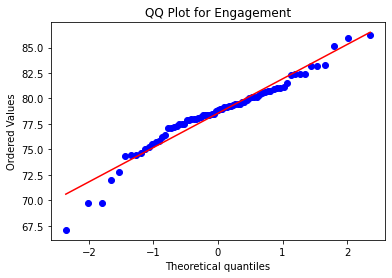

In [18]:
stats.probplot(x=df['engagement'], dist="norm", plot=plt)
plt.title("QQ Plot for Engagement")
plt.show()

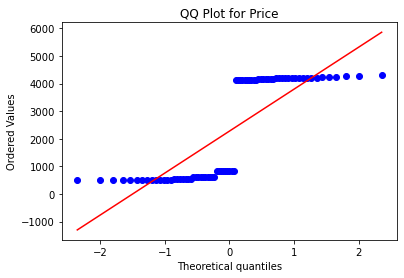

In [19]:
stats.probplot(x=df['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Price")
plt.show()

Text(78.8607594936709, 15.75, '78.86 (median)')

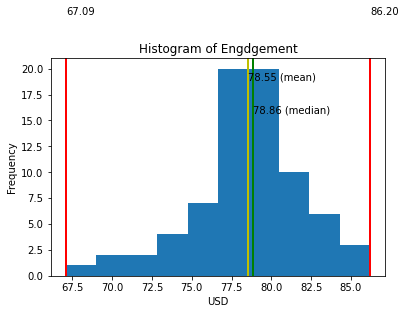

In [20]:
vari_price = df['engagement']
D_close = vari_price.plot.hist()
D_close.set_title('Histogram of Engdgement')
D_close.set_xlabel('USD')
plt.plot()
plt.axvline(vari_price.mean(), color='y', linestyle='solid', linewidth=2)
plt.axvline(vari_price.min(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.max(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.median(), color='g', linestyle='solid', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(vari_price.mean(), max_ylim*0.9, '{:.2f} (mean)'.format(vari_price.mean()))
plt.text(vari_price.max(), max_ylim*1.2, '{:.2f}'.format(vari_price.max()))
plt.text(vari_price.min(), max_ylim*1.2, '{:.2f}'.format(vari_price.min()))
plt.text(vari_price.median(), max_ylim*0.75, '{:.2f} (median)'.format(vari_price.median()))

Text(831.0, 31.5, '831.00 (median)')

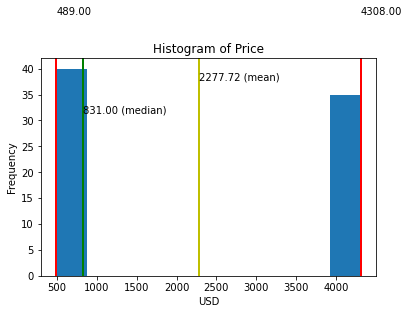

In [21]:
vari_price = df['price']
D_close = vari_price.plot.hist()
D_close.set_title('Histogram of Price')
D_close.set_xlabel('USD')
plt.plot()
plt.axvline(vari_price.mean(), color='y', linestyle='solid', linewidth=2)
plt.axvline(vari_price.min(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.max(), color='r', linestyle='solid', linewidth=2)
plt.axvline(vari_price.median(), color='g', linestyle='solid', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(vari_price.mean(), max_ylim*0.9, '{:.2f} (mean)'.format(vari_price.mean()))
plt.text(vari_price.max(), max_ylim*1.2, '{:.2f}'.format(vari_price.max()))
plt.text(vari_price.min(), max_ylim*1.2, '{:.2f}'.format(vari_price.min()))
plt.text(vari_price.median(), max_ylim*0.75, '{:.2f} (median)'.format(vari_price.median()))

In [22]:
import plotly.express as px
# categories: model, store,condition
px.scatter(df, x="price", y="engagement", color="store")  

Dataframes can be logically filtered for certain features using the function iloc
---
The iloc property returns purely integer-location based indexing for selection by position.

**.iloc[]** is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

In [24]:
df.iloc[16:32]


model              store  condition  engagement  price
16         Caracal        Super deals  Very Good   80.759494  528.0
17       Clepsydra        Super deals  Very Good   77.215190  529.5
18            Sand  Watches unlimited  Very Good   75.189873  529.5
19           Tempo   National traders  Very Good   76.455696  531.0
20  Lightning bolt   National traders   Like new   79.113924  532.5
21         Caracal        Super deals       Good   81.139241  603.0
22       Clepsydra        Super deals       Good   81.012658  603.0
23  Lightning bolt  Watches unlimited        New   77.468354  604.5
24            Sand        Super deals        New   77.341772  604.5
25       Clepsydra  Watches unlimited       Good   79.873418  604.5
26       Clepsydra   National traders       Good   80.759494  604.5
27           Tempo        Super deals        New   78.354430  606.0
28            Sand   National traders   Like new   75.063291  607.5
29  Lightning bolt        Super deals  Very Good   79.240506  607.5
30  Lightning bolt   National traders       Good   80.000000  607.5
31           Tempo  Watches unlimited  Very Good   80.126582  829.5

Similarly Dataframes can also be filtered by numerical indicies
---
The loc property is used to access a group of rows and columns by label(s) or a boolean array.

**.loc[]** is primarily label based (i.e df.column_name), but may also be used with a boolean array.

In [25]:
df.loc[(df.engagement > 77.00) & (df.condition =='Good')]

model              store condition  engagement   price
4             Sand        Super deals      Good   80.126582   502.5
15  Lightning bolt        Super deals      Good   80.126582   526.5
21         Caracal        Super deals      Good   81.139241   603.0
22       Clepsydra        Super deals      Good   81.012658   603.0
25       Clepsydra  Watches unlimited      Good   79.873418   604.5
26       Clepsydra   National traders      Good   80.759494   604.5
30  Lightning bolt   National traders      Good   80.000000   607.5
61           Tempo   National traders      Good   82.405063  4204.5
67  Lightning bolt  Watches unlimited      Good   80.886076   831.0
69            Sand  Watches unlimited      Good   81.012658  4233.0
71            Sand   National traders      Good   80.506329  4282.5
74           Tempo  Watches unlimited      Good   82.405063  4308.0

Setting Indicies
---
Pandas assigns a serial number as the index (that's the unnamed column of integers in bold face in the df.head() output above)
 Setting a custom row index for your DataFrame can be more useful in some instances. You can set the index of a DataFrame with the **.set_index()** method:


In [29]:
df = df.set_index(["store", "condition"])
df.head()

engagement  price
store             condition                   
Watches unlimited New         77.848101  489.0
National traders  Like new    75.696203  489.0
                  Good        72.025316  490.5
Super deals       Like new    78.987342  501.0
                  Good        80.126582  502.5

Grouping Your Data
---
Grouping your data by a subset of the variables in the DataFrame is a common task in which pandas excels. We use the .groupby() method to do this. You can think of groupby() as a for loop that goes through the values of some user-specified column(s) and, in each iteration, extracts only those DataFrame rows that match that value in the specified column. 


**.groupby()** is most useful when we use it together with aggregation functions (functions that summarize our data), like sum(), mean(), and others. Here we group our dataframe df by the model and condition variables. Inside, the resulting object has all the data from df, partitioned into pieces depending on the values of the two variables we grouped by. We then ask pandas to compute the mean price for each category:

In [ ]:
groups = df.groupby(["model", "condition"]) # Grouping by
groups["price"].mean()

In [ ]:
groups = df.groupby(["model"]) # Grouping by
groups["price"].mean()

In [ ]:
type(groups)

In [ ]:
# Printing GroupBy objects
for key, item in groups:
    print(groups.get_group(key))

Pivoting
---
Pivoting is basically the same as grouping by + aggregating, with the difference that you can have some of the grouping variables as columns instead of as rows. This is sometimes nicer to look at.


When you pivot, you summarize one of your numeric columns by group, where the groups are determined by some of the other columns. Some of those variables can be shown as rows, and some can be shown as columns. We create pivot tables in pandas using the **.pivot_table()** method, with the following syntax:

pd.pivot_table(my_df, values=["numeric_column"], index=["row_variable"], columns=["column_variable"])

In [ ]:
pd_pivot = pd.pivot_table(df, values= ['price'], index=['model'], columns=['condition'])
pd_pivot

In [ ]:
type(pd_pivot)

In [ ]:
df # original

In [ ]:
df.unstack()

In [ ]:
my_unstacked_df = df.unstack()
my_unstacked_df.head()

We can reverse the process using **.stack()**:


In [ ]:
my_stacked_df = my_unstacked_df.stack().iloc[0:20]
my_stacked_df